Nama Kelompok :
NIM dan Nama

210411100112_Okhi Sahrul Barkah (Ketua)

210411100119_Farid Ghozali (Anggota)

In [18]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

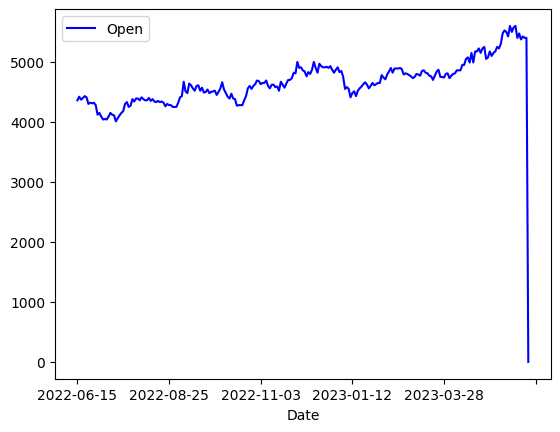

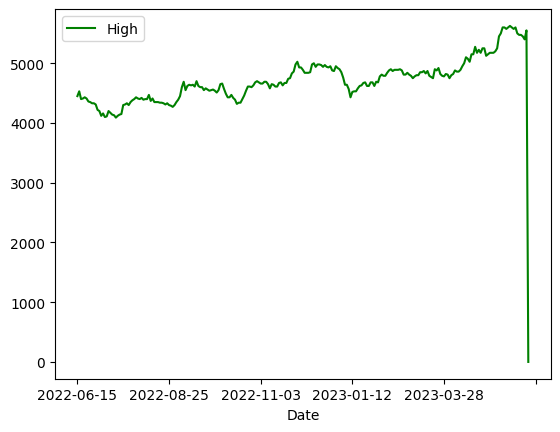

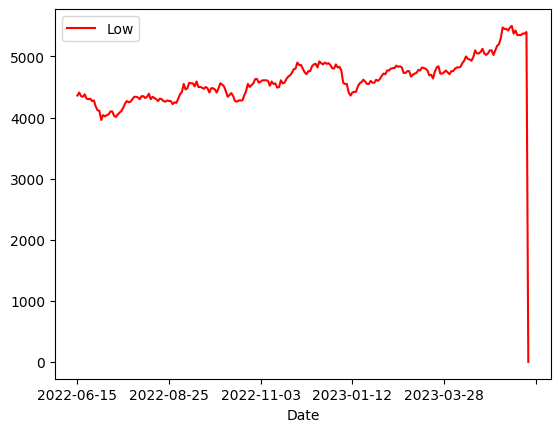

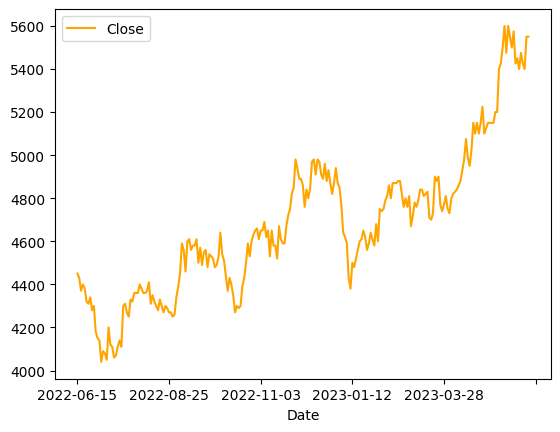

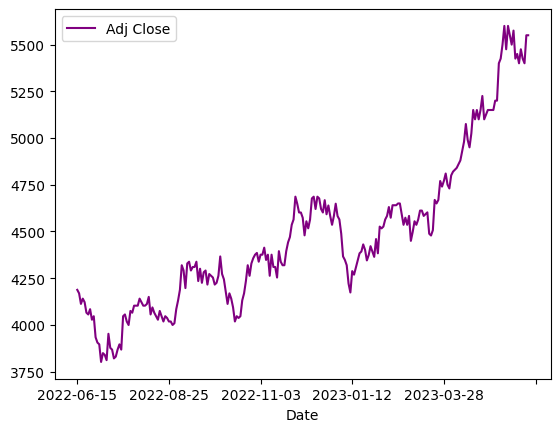

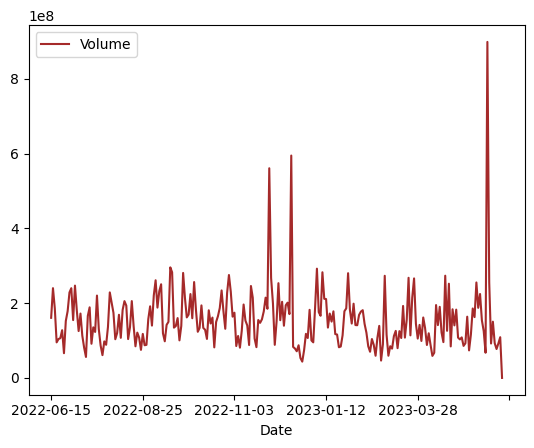

In [22]:
df = pd.read_csv("BBRI.JK.csv")
df.plot(x="Date", y="Open", color="blue", label="Open")
df.plot(x="Date", y="High", color="green", label="High")
df.plot(x="Date", y="Low", color="red", label="Low")
df.plot(x="Date", y="Close", color="orange", label="Close")
df.plot(x="Date", y="Adj Close", color="purple", label="Adj Close")
df.plot(x="Date", y="Volume", color="brown", label="Volume")
plt.legend()
plt.show()

Membaca data dari file CSV: df = pd.read_csv("BBRI.JK.csv")
Membuat plot untuk kolom "Open": df.plot(x="Date", y="Open", color="blue", label="Open")
Membuat plot untuk kolom "High": df.plot(x="Date", y="High", color="green", label="High")
Membuat plot untuk kolom "Low": df.plot(x="Date", y="Low", color="red", label="Low")
Membuat plot untuk kolom "Close": df.plot(x="Date", y="Close", color="orange", label="Close")
Membuat plot untuk kolom "Adj Close": df.plot(x="Date", y="Adj Close", color="purple", label="Adj Close")
Membuat plot untuk kolom "Volume": df.plot(x="Date", y="Volume", color="brown", label="Volume")
Menampilkan legenda: plt.legend()
Menampilkan plot: plt.show()
Dengan menggunakan kode ini, Anda dapat dengan mudah membaca data dari file CSV, membuat plot untuk beberapa kolom, dan menampilkan plot tersebut dengan legenda.

In [23]:
df.shape

(247, 7)

In [24]:
target = df['Volume']
print(target)

0      160729900
1      240023000
2      185763100
3       95058800
4      103964600
         ...    
242     92794100
243     77251000
244     92314200
245    108831400
246            0
Name: Volume, Length: 247, dtype: int64


In [25]:
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    # Mencari n akhir
    end_ix = i + n_steps
    # Memeriksa urutan terluar dari data
    if end_ix > len(sequence)-1:
      break
    # Menambahkan bagian input dan output
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

# Menentukan Waktu dari data time series
jmlh_X = 5
print('Shapes Target = ',target.shape)
#Split data fitur dan target
X, y = split_sequence(target, jmlh_X)
print('Shapes X = ',X.shape)
print('Shapes Y = ',y.shape)

Shapes Target =  (247,)
Shapes X =  (242, 5)
Shapes Y =  (242,)


In [26]:
newFitur = pd.DataFrame(X, columns=['Xt-'+str(i) for i in range(jmlh_X-1, -1,-1)])
newTarget = pd.DataFrame(y, columns=['Data Prediksi'])

In [27]:
newData = pd.concat([newFitur,newTarget], axis=1)
newData

,Xt-4,Xt-3,Xt-2,Xt-1,Xt-0,Data Prediksi
0,160729900,240023000,185763100,95058800,103964600,106208500
1,240023000,185763100,95058800,103964600,106208500,127600700
2,185763100,95058800,103964600,106208500,127600700,66083900
3,95058800,103964600,106208500,127600700,66083900,152306100
4,103964600,106208500,127600700,66083900,152306100,178535800
...,...,...,...,...,...,...
237,67363200,898453700,255472600,92019300,150377000,92794100
238,898453700,255472600,92019300,150377000,92794100,77251000
239,255472600,92019300,150377000,92794100,77251000,92314200
240,92019300,150377000,92794100,77251000,92314200,108831400


In [28]:
newData = pd.concat([newFitur, newTarget], axis=1)
newData.to_csv("new_data.csv", index=False)

In [34]:
pip install --upgrade jupyter

     |████████████████████████████████| 288 kB 9.4 MB/s eta 0:00:01
     |████████████████████████████████| 138 kB 59.2 MB/s eta 0:00:01
     |████████████████████████████████| 529 kB 6.6 MB/s eta 0:00:01:01
     |████████████████████████████████| 121 kB 50.8 MB/s eta 0:00:01
     |████████████████████████████████| 73 kB 3.0 MB/s  eta 0:00:01
     |████████████████████████████████| 142 kB 54.7 MB/s eta 0:00:01
     |████████████████████████████████| 77 kB 7.6 MB/s  eta 0:00:01
     |████████████████████████████████| 133 kB 56.6 MB/s eta 0:00:01
     |████████████████████████████████| 162 kB 49.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 44.3 MB/s eta 0:00:01
     |████████████████████████████████| 198 kB 53.4 MB/s eta 0:00:01
     |████████████████████████████████| 60 kB 2.0 MB/s eta 0:00:011
     |████████████████████████████████| 10.0 MB 50.2 MB/s eta 0:00:01    |███▋                            | 1.1 MB 50.2 MB/s eta 0:00:01     |█████████████████████▎          

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_norm= scaler.fit_transform(newFitur)
print(X_norm)

ModuleNotFoundError: No module named 'sklearn'

Split Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=0)